<a href="https://colab.research.google.com/github/Vishal487/ML-Image-classification/blob/master/Images_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 

import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [ ]:
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150


## Data preparation
Format the images into appropriately pre-processed floating point tensors before feeding to the network:

1. Read images from the disk.
2. Decode contents of these images and convert it into proper grid format as per their RGB content.
3. Convert them into floating point tensors.
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

Fortunately, all these tasks can be done with the `ImageDataGenerator` class provided by `tf.keras`. It can read images from disk and preprocess them into proper tensors. It will also set up generators that convert these images into batches of tensors—helpful when training the network.

In [ ]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


## Visualizing the training images
Visualize the training images by extracting a batch of images from the training generator—which is 32 images in this example—then plot five of them with matplotlib.

In [ ]:
sample_training_images, sample_training_labels = next(train_data_gen)

The `next` function returns a batch from the dataset. The return value of `next` function is in form of `(x_train, y_train)` where x_train is training features and y_train, its labels.

In [ ]:
# lets plot some images
classes = ['cat', 'dog']

def plotImages(images_arr):
    plt.figure(figsize=(10,10))
    for i in range(len(images_arr)):
        img = images_arr[i]
        plt.subplot(5, 5, i+1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
    plt.show()

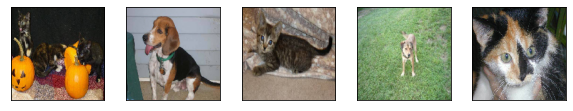

In [ ]:
plotImages(sample_training_images[:5])

## Create the model

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)            

## Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model
Use the `fit_generator` method of the `ImageDataGenerator` class to train the network.



In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 49s 3s/step - loss: 0.0921 - accuracy: 0.9722 - val_loss: 0.8859 - val_accuracy: 0.7221
Epoch 2/15
15/15 [==============================] - 51s 3s/step - loss: 0.0759 - accuracy: 0.9766 - val_loss: 0.8972 - val_accuracy: 0.7355
Epoch 3/15
15/15 [==============================] - 51s 3s/step - loss: 0.0666 - accuracy: 0.9722 - val_loss: 0.9531 - val_accuracy: 0.7299
Epoch 4/15
15/15 [==============================] - 50s 3s/step - loss: 0.0446 - accuracy: 0.9893 - val_loss: 1.0643 - val_accuracy: 0.7333
Epoch 5/15
15/15 [==============================] - 49s 3s/step - loss: 0.0337 - accuracy: 0.9931 - val_loss: 1.0909 - val_accuracy: 0.7321
Epoch 6/15
15/15 [==============================] - 50s 3s/step - loss: 0.0224 - accuracy: 0.9963 - val_loss: 1.1007 - val_accuracy: 0.7400
Epoch 7/15
15/15 [==============================] - 50s 3s/step - loss: 0.0138 - accuracy: 0.9973 - val_loss: 1.1790 - val_accuracy: 0.7522
Epoch 8/15
15/15 [==

### Visualization training results

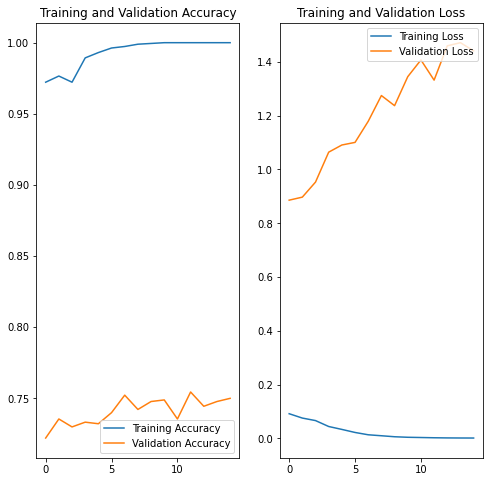

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history.history['loss'], label='Training Loss')
plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Khatarnaak wala `Overfitting`**

## Overfitting
There are multiple ways to fight overfitting in the training process. In this tutorial, we'll use `data augmentation` and add `dropout` to our model.

### Data augmentation
Overfitting generally occurs when there are a `small` number of training examples. One way to fix this problem is to `augment` the dataset so that it has a sufficient number of training examples. Data augmentation takes the approach of generating more training data from existing training samples by augmenting the samples using random transformations that yield believable-looking images. The goal is the model will never see the exact same picture twice during training. This helps expose the model to more aspects of the data and generalize better.

Implement this in tf.keras using the ImageDataGenerator class. Pass different transformations to the dataset and it will take care of applying it during the training process.

#### Augment and visualize data
Begin by applying random horizontal flip augmentation to the dataset and see how individual images look like after the transformation.

#### Apply horizontal flip
Pass horizontal_flip as an argument to the ImageDataGenerator class and set it to True to apply this augmentation.

In [ ]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True)


In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [ ]:
# let's see for one e.g.

augmented_images =  [train_data_gen[0][0][0] for i in range(5)]

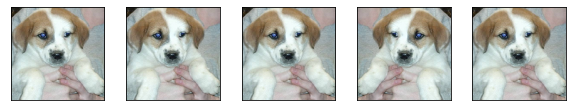

In [ ]:
plotImages(augmented_images)

#### Randomly rotate the image
Let's take a look at a different augmentation called rotation and apply 45 degrees of rotation randomly to the training examples.

In [ ]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=45)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


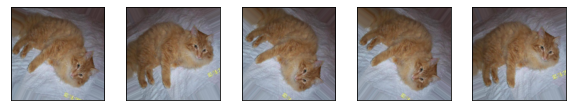

In [ ]:
plotImages(augmented_images)

#### Apply zoom augmentation
apply zoom upto 50% randomly to the dataset

In [ ]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 2000 images belonging to 2 classes.


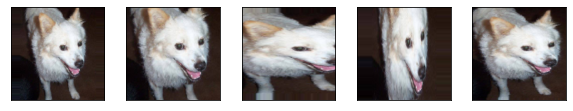

In [ ]:
plotImages(augmented_images)

#### Put it all together

In [ ]:
image_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  rotation_range=45,
                                                                  width_shift_range=.15,
                                                                  horizontal_flip=True,
                                                                  zoom_range=0.5)


In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

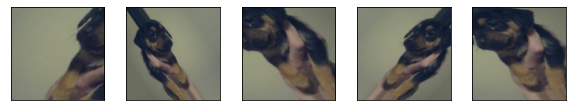

In [ ]:
plotImages(augmented_images)

### Create validation data generator
Generally, only apply data augmentation to the training examples. In this case, only rescale the validation images and convert them into batches using `ImageDataGenerator.`

In [ ]:
image_gen_val = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


## Dropout
Another technique to reduce overfitting is to introduce `dropout` to the network. It is a form of **`regularization`** that forces the weights in the network to take `only small values`, which makes the distribution of weight values more regular and the network can reduce overfitting on small training examples.

When we apply dropout to a layer it randomly drops out (set to zero) number of output units from the applied layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

When appling 0.1 dropout to a certain layer, it randomly kills 10% of the output units in each training epoch.

Create a network architecture with this new dropout feature and apply it to different convolutions and fully-connected layers.

## Creating a new networks with Dropouts
Here we apply dropout to first and last max pool layers.

In [ ]:
model_new = tf.keras.models.Sequential([
                  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                                         input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
                   tf.keras.layers.MaxPooling2D(),
                   tf.keras.layers.Dropout(0.2),
                   tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
                   tf.keras.layers.MaxPooling2D(),
                   tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
                   tf.keras.layers.MaxPooling2D(),
                   tf.keras.layers.Dropout(0.2),
                   tf.keras.layers.Flatten(),
                   tf.keras.layers.Dense(512, activation='relu'),
                   tf.keras.layers.Dense(1)
])


## Compile the model


In [ ]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)            

## Train the model

In [ ]:
history = model_new.fit_generator(
        train_data_gen,
        steps_per_epoch=total_train//batch_size,
        epochs=epochs,
        validation_data=val_data_gen,
        validation_steps=total_val//batch_size
)

Epoch 1/15
15/15 [==============================] - 60s 4s/step - loss: 1.0260 - accuracy: 0.4932 - val_loss: 0.6918 - val_accuracy: 0.4955
Epoch 2/15
15/15 [==============================] - 59s 4s/step - loss: 0.6934 - accuracy: 0.5059 - val_loss: 0.6927 - val_accuracy: 0.5022
Epoch 3/15
15/15 [==============================] - 58s 4s/step - loss: 0.6929 - accuracy: 0.4957 - val_loss: 0.6925 - val_accuracy: 0.5067
Epoch 4/15
15/15 [==============================] - 58s 4s/step - loss: 0.6925 - accuracy: 0.5005 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 5/15
15/15 [==============================] - 58s 4s/step - loss: 0.6903 - accuracy: 0.5005 - val_loss: 0.6826 - val_accuracy: 0.5022
Epoch 6/15
15/15 [==============================] - 58s 4s/step - loss: 0.6896 - accuracy: 0.4973 - val_loss: 0.7003 - val_accuracy: 0.5089
Epoch 7/15
15/15 [==============================] - 58s 4s/step - loss: 0.6948 - accuracy: 0.5053 - val_loss: 0.6925 - val_accuracy: 0.4900
Epoch 8/15
15/15 [==

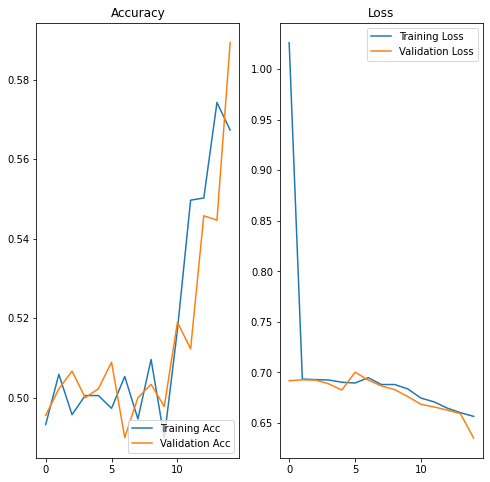

In [ ]:
## Visualize the model

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), history.history['accuracy'], label='Training Acc')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(range(epochs), history.history['loss'], label='Training Loss')
plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

THANK YOU!!!